# This file is a testing environment for Kohonen network

Kohonen network is a unsupervised network that learns using a concept called *competitive learning*.

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from som import KohonenNetwork, Normalizer

In [2]:
data_dir = Path("data")

cube = pd.read_csv(data_dir / "cube.csv")
hexagon = pd.read_csv(data_dir / "hexagon.csv")

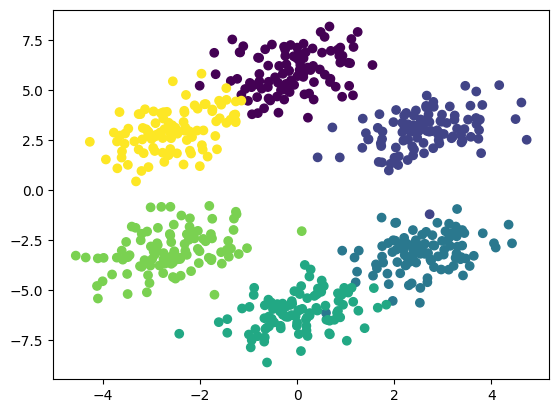

In [3]:
plt.scatter(hexagon["x"], hexagon["y"], c=hexagon["c"])

In [4]:
norm = Normalizer(hexagon[["x", "y"]])
hex_normalized = norm(hexagon[["x", "y"]])

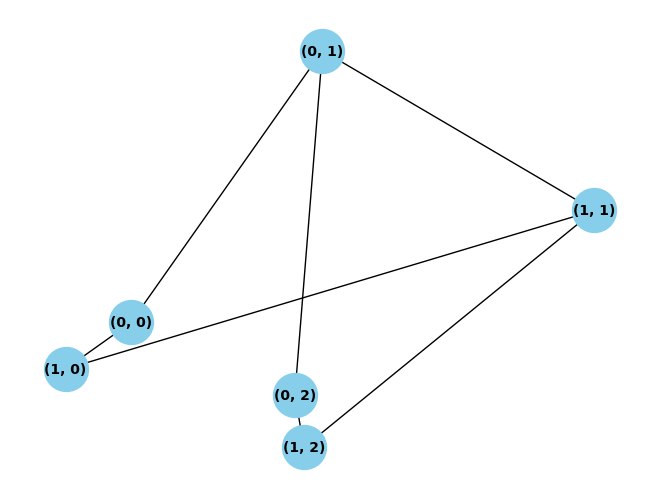

In [5]:
koh = KohonenNetwork(2, 3, lambda_param=1, neighboring_width=2, time_scale=False, sigma = 1, init_method = "random", dataset = hexagon[["x", "y"]].values)
koh.plot_graph()

In [6]:
koh.fit(hexagon[["x", "y"]].values, 500, history=False, verbose=True)

Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29
Epoch 30
Epoch 31
Epoch 32
Epoch 33
Epoch 34
Epoch 35
Epoch 36
Epoch 37
Epoch 38
Epoch 39
Epoch 40
Epoch 41
Epoch 42
Epoch 43
Epoch 44
Epoch 45
Epoch 46
Epoch 47
Epoch 48
Epoch 49
Epoch 50
Epoch 51
Epoch 52
Epoch 53
Epoch 54
Epoch 55
Epoch 56
Epoch 57
Epoch 58
Epoch 59
Epoch 60
Epoch 61
Epoch 62
Epoch 63
Epoch 64
Epoch 65
Epoch 66
Epoch 67
Epoch 68
Epoch 69
Epoch 70
Epoch 71
Epoch 72
Epoch 73
Epoch 74
Epoch 75
Epoch 76
Epoch 77
Epoch 78
Epoch 79
Epoch 80
Epoch 81
Epoch 82
Epoch 83
Epoch 84
Epoch 85
Epoch 86
Epoch 87
Epoch 88
Epoch 89
Epoch 90
Epoch 91
Epoch 92
Epoch 93
Epoch 94
Epoch 95
Epoch 96
Epoch 97
Epoch 98
Epoch 99
Epoch 100
Epoch 101
Epoch 102
Epoch 103
Epoch 104
Epoch 105
Epoch 106
Epoch 107
Epoch 108
Epoch 109
Epoch 110


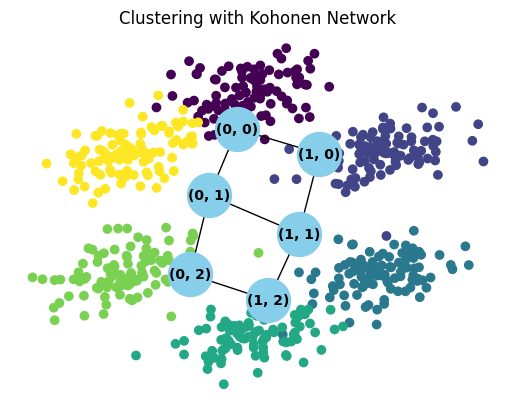

In [7]:
plt.scatter(hexagon["x"], hexagon["y"], c=hexagon["c"])
plt.title("Clustering with Kohonen Network")
koh.plot_graph()

## Values of neighbouring function



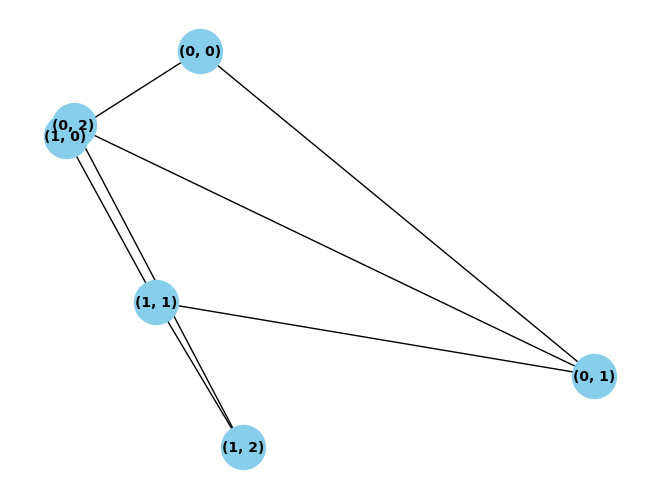

In [57]:
koh = KohonenNetwork(2, 3, lambda_param=1, neighboring_width=1, time_scale=False, sigma = 0.3, neighboring_func="gaussian")
koh.plot_graph()

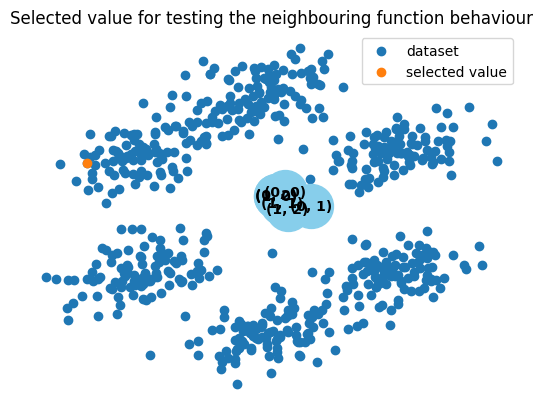

In [58]:
x = hexagon[["x", "y"]].values[18]
plt.scatter(hexagon["x"], hexagon["y"], label = "dataset")
plt.scatter(x[0], x[1], label = "selected value")
plt.title("Selected value for testing the neighbouring function behaviour")
plt.legend()
koh.plot_graph()

In [59]:
distances = np.linalg.norm(koh.cells.reshape(-1, 2) - x, axis=1)
best_i, best_j = np.unravel_index(np.argmin(distances, axis=None), (koh.M, koh.N))
distances

array([4.32071924, 5.0882989 , 4.21685816, 4.21567758, 4.47761398,
       4.7286234 ])

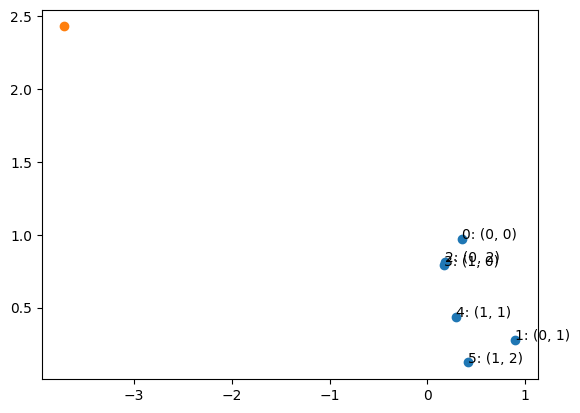

In [60]:
plt.scatter(koh.cells.reshape(-1, 2)[:, 0], koh.cells.reshape(-1, 2)[:, 1])
for i, txt in enumerate(range(len(koh.cells.reshape(-1, 2)))):
    plt.annotate(f"{i}: {(i//3, i%3)}", (koh.cells.reshape(-1, 2)[i, 0], koh.cells.reshape(-1, 2)[i, 1]))

plt.scatter(x[0], x[1])

In [61]:
i, j = koh.find_best_matching_unit(x)
print(f"The best matching unit is {(i, j)}")

The best matching unit is (1, 0)


In [62]:
koh.update_cells(x, i, j, 1)

In [63]:
koh.fit(hexagon[["x", "y"]].values, 100, history=False, verbose=True)

Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29
Epoch 30
Epoch 31
Epoch 32
Epoch 33
Epoch 34
Epoch 35
Epoch 36
Epoch 37
Epoch 38
Epoch 39
Epoch 40
Epoch 41
Epoch 42
Epoch 43
Epoch 44
Epoch 45
Epoch 46
Epoch 47
Epoch 48
Epoch 49
Epoch 50
Epoch 51
Epoch 52
Epoch 53
Epoch 54
Epoch 55
Epoch 56
Epoch 57
Epoch 58
Epoch 59
Epoch 60
Epoch 61
Epoch 62
Epoch 63
Epoch 64
Epoch 65
Epoch 66
Epoch 67
Epoch 68
Epoch 69
Epoch 70
Epoch 71
Epoch 72
Epoch 73
Epoch 74
Epoch 75
Epoch 76
Epoch 77
Epoch 78
Epoch 79
Epoch 80
Epoch 81
Epoch 82
Epoch 83
Epoch 84
Epoch 85
Epoch 86
Epoch 87
Epoch 88
Epoch 89
Epoch 90
Epoch 91
Epoch 92
Epoch 93
Epoch 94
Epoch 95
Epoch 96
Epoch 97
Epoch 98
Epoch 99


In [55]:
t = 1
best_unit = koh._pos[i, j]
for m in range(koh.M):
    for n in range(koh.N):
        current_unit = koh._pos[m, n]
        print(f"({m,n}) {koh.neighboring_width * koh.alpha(t) * koh.neighboring_func(current_unit, best_unit, t) * (x - koh.cells[m, n])}")

((0, 0)) [-0.0002556   0.00063319]
((0, 1)) [-0.27390403  0.0156227 ]
((0, 2)) [-1.3363418  -1.03141728]
((1, 0)) [-6.57432092e-05  1.28481191e-04]
((1, 1)) [-0.03736602  0.02952177]
((1, 2)) [-0.10073996 -0.01017874]


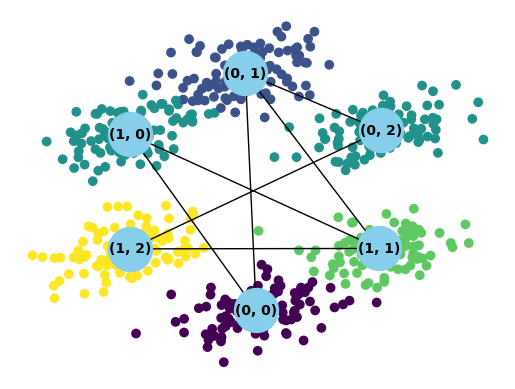

In [65]:
som_labels = koh.predict(hexagon[["x", "y"]].values)
plt.scatter(hexagon["x"], hexagon["y"], c=som_labels)
koh.plot_graph()

## Measure the quality of clustering
We will use different measures to check the quality of clustering performed by the network. The measures are:
1. Fraction of variance unexplained
2. Silhouette
3. Celinski-Harabasz
4. Davies-Bouldin

Initially we will check if the clusters formed by the network are similar to the ones in the dataset and verify if the labels are similar to the clusters.

### Fraction of variance unexplained
To measure the fraction of variance unexplained we will firstly calculate the total variance of the original dataset and then calculate the variance of the residual from BMU (Best Matching Units) from the network and the actual value.

The total variance is calculated as the squared sum of distance of the actual value from the original dataset to the mean point of the dataset. The residual variance is calculated as the squared sum of the distances from BMU to the actual value.

In [41]:
mean = np.mean(hexagon[["x", "y"]].values, axis=0)
distances = np.linalg.norm(hexagon[["x", "y"]].values - mean, axis=1)
total_variance = np.sum(distances ** 2) / hexagon.shape[0]
print(f"Total variance: {total_variance}") 

Total variance: 24.20435020554349


In [42]:
residual_distances = np.linalg.norm(hexagon[["x", "y"]].values - koh.predict(hexagon[["x", "y"]].values, return_labels=False), axis=1)
residual_variance = np.sum(residual_distances ** 2) / hexagon.shape[0]
print(f"Residual variance: {residual_variance}")

Residual variance: 31.329799031160377


In [43]:
labels = koh.predict(hexagon[["x", "y"]].values)

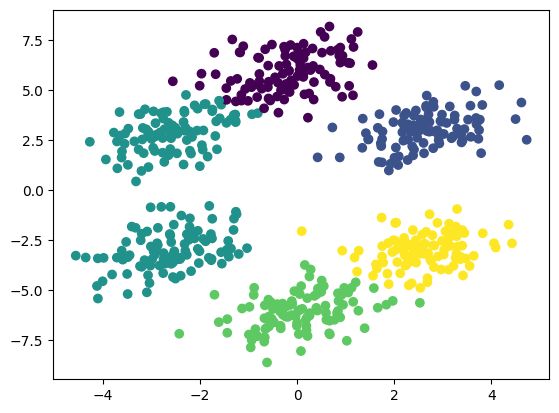

In [44]:
plt.scatter(hexagon["x"], hexagon["y"], c=labels)

(array([ 6.,  6., 11., 22., 39., 47., 79., 69., 54., 57., 43., 34., 33.,
        31., 23., 21., 14.,  6.,  3.,  2.]),
 array([1.6345411 , 1.98274911, 2.33095711, 2.67916511, 3.02737311,
        3.37558112, 3.72378912, 4.07199712, 4.42020512, 4.76841312,
        5.11662113, 5.46482913, 5.81303713, 6.16124513, 6.50945314,
        6.85766114, 7.20586914, 7.55407714, 7.90228514, 8.25049315,
        8.59870115]),
 <BarContainer object of 20 artists>)

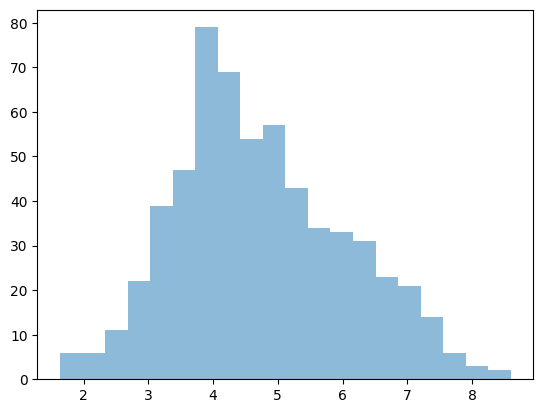

In [45]:
plt.hist(distances, bins=20, alpha=0.5, label="Original")

(array([  2.,  18.,  37.,  81., 151., 129.,  99.,  57.,  22.,   4.]),
 array([0.76229288, 1.66288118, 2.56346948, 3.46405778, 4.36464608,
        5.26523438, 6.16582268, 7.06641098, 7.96699928, 8.86758758,
        9.76817588]),
 <BarContainer object of 10 artists>)

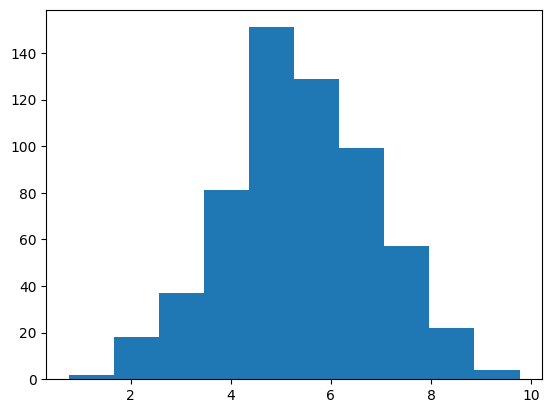

In [46]:
# plot residual distances
plt.hist(residual_distances)

In [47]:
fraction = residual_variance / total_variance
print(f"Fraction of variance unexplained: {fraction}") 

Fraction of variance unexplained: 1.2943871149238682


#### Conslusion

It seems like the fraction of variance unexplained is not a good measure of clustering quality in our case, there are too much diversity within the clusters and the overall variance is very high. There is also a possibility that there is a problem with my approach and implementation

### Silhouette, Davies-bouldin and Calinski-Harabasz score
These scores are used to measure the quality of clustering. For given dataset and labels created by the clustering algorithm

In [81]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score


labels = koh.predict(hexagon[["x", "y"]].values)

print(f"Silhouette score: {silhouette_score(hexagon[['x', 'y']].values, labels)}")
print(f"Davies-Bouldin score: {davies_bouldin_score(hexagon[['x', 'y']].values, labels)}")
print(f"Calinski-Harabasz score: {calinski_harabasz_score(hexagon[['x', 'y']].values, labels)}")

Silhouette score: 0.5490091948175947
Davies-Bouldin score: 0.6091670074361912
Calinski-Harabasz score: 1173.5724868409961


## Scores in relation to the neighbouring width

In [68]:
widths = np.linspace(0.1, 1, 10)
epochs = 50
silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []
labels = hexagon["c"].values

for width in widths:
    koh = KohonenNetwork(2, 3, neighboring_width=width, sigma=0.3, time_scale=False)
    koh.fit(hexagon[["x", "y"]].values, epochs)
    labels = koh.predict(hexagon[["x", "y"]].values, return_labels=True)
    silhouette_scores.append(silhouette_score(hexagon[['x', 'y']].values, labels))
    davies_bouldin_scores.append(davies_bouldin_score(hexagon[['x', 'y']].values, labels))
    calinski_harabasz_scores.append(calinski_harabasz_score(hexagon[['x', 'y']].values, labels))

Text(0.5, 1.0, 'Silhouette score vs neighboring width')

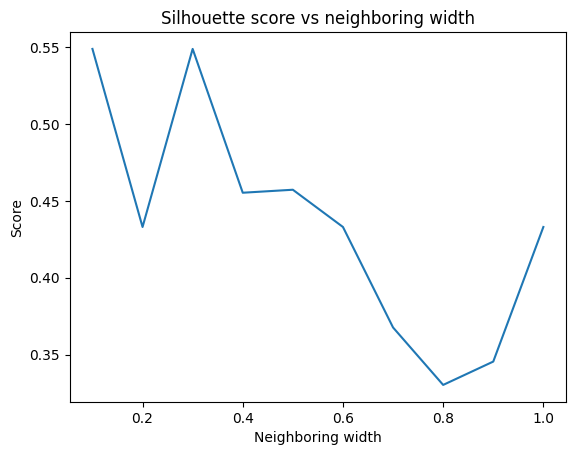

In [69]:
plt.plot(widths, silhouette_scores, label="Silhouette")
plt.xlabel("Neighboring width")
plt.ylabel("Score")
plt.title("Silhouette score vs neighboring width")

Text(0.5, 1.0, 'Davies-Bouldin score vs neighboring width')

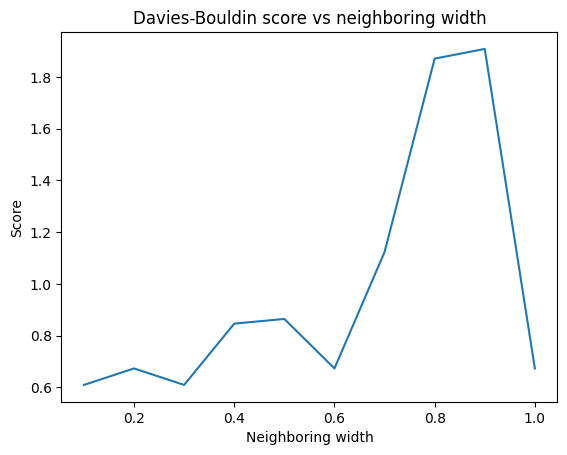

In [70]:
plt.plot(widths, davies_bouldin_scores, label="Davies-Bouldin")
plt.xlabel("Neighboring width")
plt.ylabel("Score")
plt.title("Davies-Bouldin score vs neighboring width")

Text(0.5, 1.0, 'Calinski-Harabasz score vs neighboring width')

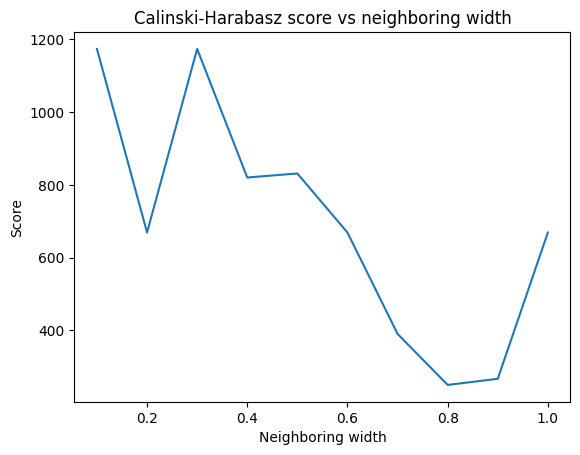

In [71]:
plt.plot(widths, calinski_harabasz_scores, label="Calinski-Harabasz")
plt.xlabel("Neighboring width")
plt.ylabel("Score")
plt.title("Calinski-Harabasz score vs neighboring width")

### Clustering quality using the labels

We will verify if the dataset labels match those generated by network. For this purpose we will use the:
1. Homogenity score
2. Completness score
3. V-measure score

A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class. 

A clustering result satisfies completeness if all the data points that are members of a given class are elements of the same cluster.

V-measure is the harmonic mean between homogenity and completness



In [80]:
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score
som_labels = koh.predict(hexagon[["x", "y"]].values)
labels = hexagon["c"].values
print("Homogeneity: %0.3f" % homogeneity_score(labels, som_labels))
print("Completeness: %0.3f" % completeness_score(labels, som_labels))
print("V-measure: %0.3f" % v_measure_score(labels, som_labels))

Homogeneity: 0.840
Completeness: 0.964
V-measure: 0.898


In [72]:
widths = np.linspace(0.1, 1, 10)
epochs = 50
num_trails = 1
scores = list(range(num_trails))
labels = hexagon["c"].values

for trail in range(num_trails):
    print(f"Trail {trail}")
    scores[trail] = {"homogeneity": [], "completeness": [], "v_measure": [], "silhouette": [], "davies_bouldin": [], "calinski_harabasz": []}
    for width in widths:
        koh = KohonenNetwork(2, 3, neighboring_width=width, sigma=0.3)
        koh.fit(hexagon[["x", "y"]].values, epochs)
        som_labels = koh.predict(hexagon[["x", "y"]].values, return_labels=True)
        scores[trail]["homogeneity"].append(homogeneity_score(hexagon["c"].values, som_labels))
        scores[trail]["completeness"].append(completeness_score(hexagon["c"].values, som_labels))
        scores[trail]["v_measure"].append(v_measure_score(hexagon["c"].values, som_labels))

        scores[trail]["silhouette"].append(silhouette_score(hexagon[['x', 'y']].values, som_labels))
        scores[trail]["davies_bouldin"].append(davies_bouldin_score(hexagon[['x', 'y']].values, som_labels))
        scores[trail]["calinski_harabasz"].append(calinski_harabasz_score(hexagon[['x', 'y']].values, som_labels))


Trail 0


In [73]:
mean_scores = {key: np.mean([scores[trail][key] for trail in range(num_trails)], axis=0) for key in scores[0].keys()}
std_scores = {key: np.std([scores[trail][key] for trail in range(num_trails)], axis=0) for key in scores[0].keys()}

In [74]:
std_scores

{'homogeneity': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'completeness': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'v_measure': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'silhouette': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'davies_bouldin': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'calinski_harabasz': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])}

Text(0.5, 0.98, 'Clustering scores vs neighboring width')

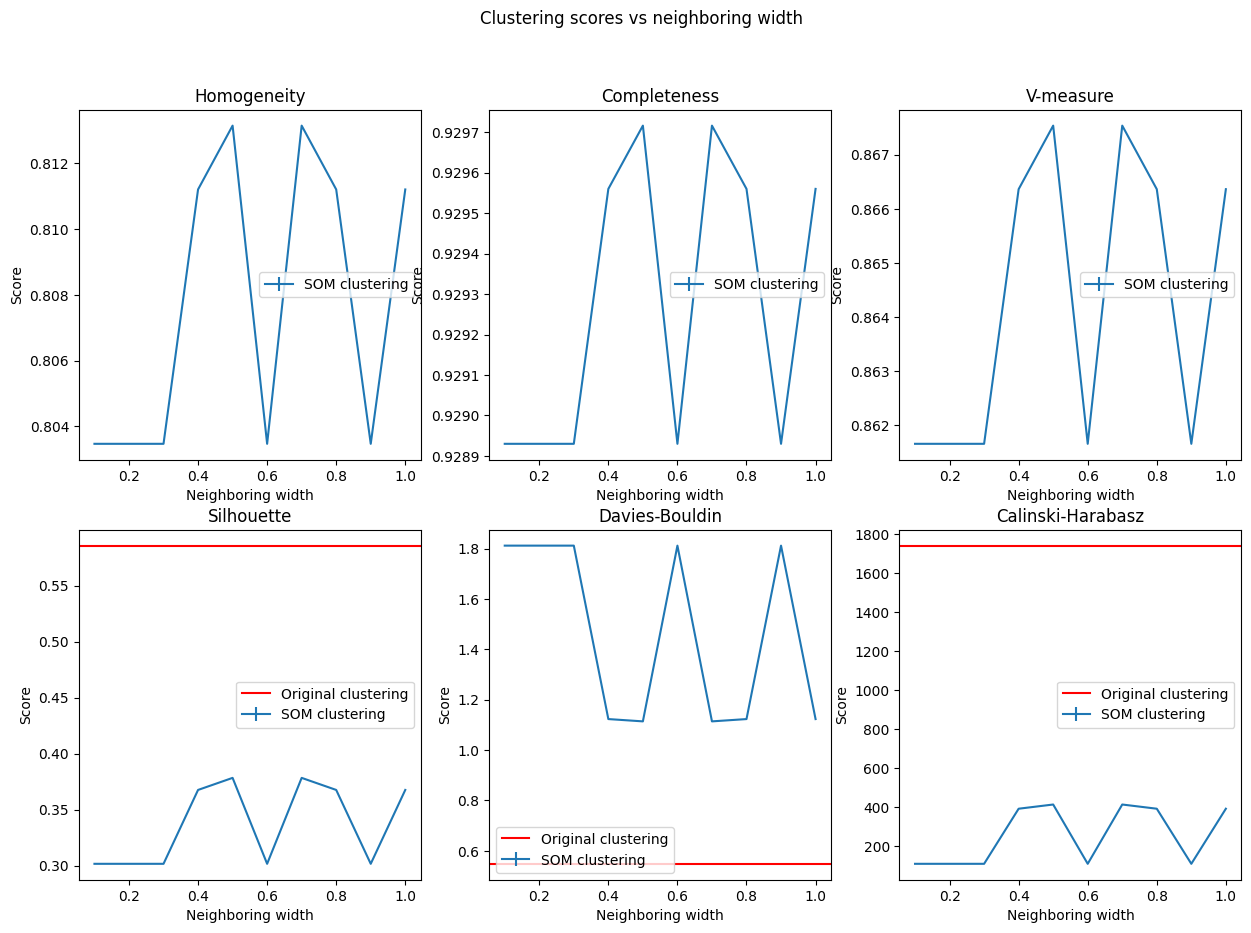

In [75]:
# subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs[0, 0].errorbar(widths, mean_scores["homogeneity"], yerr = std_scores["homogeneity"], label="SOM clustering"); axs[0, 0].set_title("Homogeneity")
axs[0, 1].errorbar(widths, mean_scores["completeness"], yerr = std_scores["completeness"], label="SOM clustering"); axs[0, 1].set_title("Completeness")
axs[0, 2].errorbar(widths, mean_scores["v_measure"], yerr = std_scores["v_measure"], label="SOM clustering"); axs[0, 2].set_title("V-measure")

#axs[0, 0].axhline(homogeneity_score(hexagon["c"].values, hexagon["c"].values), c="red", label="Original clustering")
#axs[0, 1].axhline(completeness_score(hexagon["c"].values, hexagon["c"].values), c="red", label="Original clustering")
#axs[0, 2].axhline(v_measure_score(hexagon["c"].values, hexagon["c"].values), c="red", label="Original clustering")

axs[1, 0].errorbar(widths, mean_scores["silhouette"], yerr = std_scores["silhouette"], label="SOM clustering"); axs[1, 0].set_title("Silhouette")
axs[1, 1].errorbar(widths, mean_scores["davies_bouldin"], yerr = std_scores["davies_bouldin"], label="SOM clustering"); axs[1, 1].set_title("Davies-Bouldin")
axs[1, 2].errorbar(widths, mean_scores["calinski_harabasz"], yerr = std_scores["calinski_harabasz"], label="SOM clustering"); axs[1, 2].set_title("Calinski-Harabasz")

axs[1,0].axhline(silhouette_score(hexagon[['x', 'y']].values, hexagon["c"].values), c="red", label="Original clustering")
axs[1,1].axhline(davies_bouldin_score(hexagon[['x', 'y']].values, hexagon["c"].values), c="red", label="Original clustering")
axs[1,2].axhline(calinski_harabasz_score(hexagon[['x', 'y']].values, hexagon["c"].values), c="red", label="Original clustering")

for i in range(2):
    for j in range(3):
        # set the title as label
        axs[i, j].set_xlabel("Neighboring width")
        axs[i, j].set_ylabel("Score")
        axs[i, j].legend()


plt.suptitle("Clustering scores vs neighboring width")


### Conclusion

It looks like the clustering quality does not depends that much on the width of the neighbourhood, but the larger the neighbourhood the better results. 

There are very little differences accross different runs of the algorithm - it seems very stable in this case

### Number of epochs

We will check how the number of epochs affects the quality of clustering.

In [76]:
epochs = 200
width = 1
num_trails = 10
scores = list(range(num_trails))
labels = hexagon["c"].values

for trail in range(num_trails):
    scores[trail] = {"homogeneity": [], "completeness": [], "v_measure": [], "silhouette": [], "davies_bouldin": [], "calinski_harabasz": []}
    koh = KohonenNetwork(2, 3, neighboring_width=width, sigma=0.3)
    print(f"Trail {trail}")
    old_labels = koh.fit(hexagon[["x", "y"]].values, epochs, verbose = False, history=True)

    for epoch in range(1, epochs):
        som_labels = old_labels[epoch]
        scores[trail]["homogeneity"].append(homogeneity_score(hexagon["c"].values, som_labels))
        scores[trail]["completeness"].append(completeness_score(hexagon["c"].values, som_labels))
        scores[trail]["v_measure"].append(v_measure_score(hexagon["c"].values, som_labels))

        scores[trail]["silhouette"].append(silhouette_score(hexagon[['x', 'y']].values, som_labels))
        scores[trail]["davies_bouldin"].append(davies_bouldin_score(hexagon[['x', 'y']].values, som_labels))
        scores[trail]["calinski_harabasz"].append(calinski_harabasz_score(hexagon[['x', 'y']].values, som_labels))




Trail 0
Trail 1
Trail 2
Trail 3
Trail 4
Trail 5
Trail 6
Trail 7
Trail 8
Trail 9


In [77]:
mean_scores = {key: np.mean([scores[trail][key] for trail in range(num_trails)], axis=0) for key in scores[0].keys()}
std_scores = {key: np.std([scores[trail][key] for trail in range(num_trails)], axis=0) for key in scores[0].keys()}

In [84]:
scores[9]

{'homogeneity': [0.7208204634082088,
  0.8194802858548568,
  0.6977407230807305,
  0.8390463896054995,
  0.8313728738399037,
  0.8366872650307469,
  0.8267518448704863,
  0.8291510586077252,
  0.8346061158606597,
  0.8336764794557097,
  0.8365673716377492,
  0.8479957038884157,
  0.8367354964453986,
  0.834387865341874,
  0.8396525256090771,
  0.8321734130428668,
  0.8371455323355909,
  0.8396525256090771,
  0.8367354964453986,
  0.8396525256090771,
  0.8369350065979487,
  0.8396525256090771,
  0.843433620485884,
  0.842795924612223,
  0.8382338412096916,
  0.8448428130432233,
  0.8396525256090771,
  0.8396525256090771,
  0.8448428130432233,
  0.8382338412096916,
  0.8396525256090771,
  0.8396525256090771,
  0.8396525256090771,
  0.8396525256090771,
  0.8396525256090771,
  0.8396525256090771,
  0.8396525256090771,
  0.8396525256090771,
  0.8396525256090771,
  0.8396525256090771,
  0.8396525256090771,
  0.8396525256090771,
  0.8396525256090771,
  0.8396525256090771,
  0.8396525256090771

Text(0.5, 0.98, 'Clustering scores vs epochs')

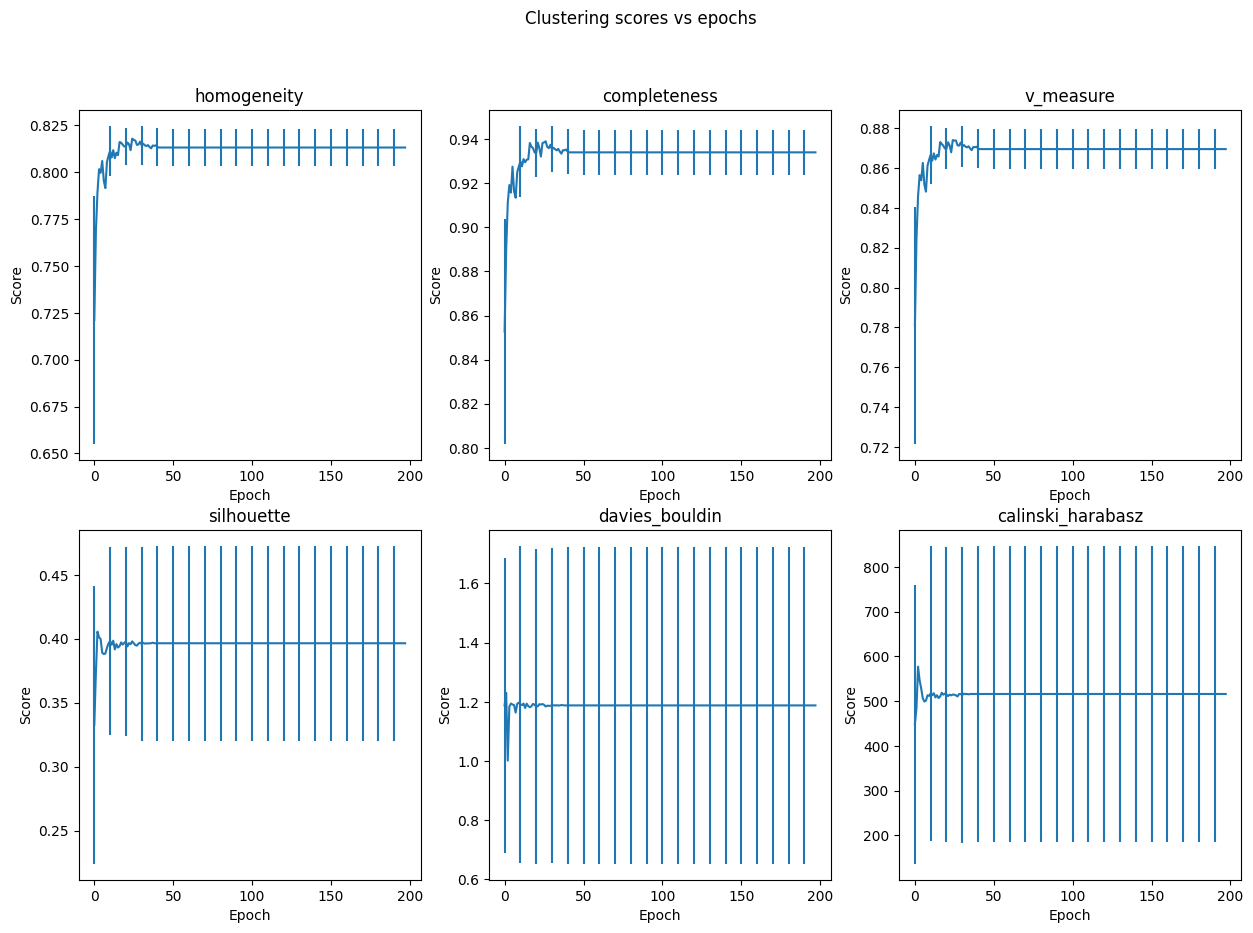

In [85]:
# subplots
starting_epoch = 1
errorevery = 10

fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs[0, 0].errorbar(list(range(epochs - starting_epoch - 1)), mean_scores["homogeneity"][starting_epoch:], yerr = std_scores["homogeneity"][starting_epoch:], label="Homogeneity", errorevery=errorevery)
axs[0, 1].errorbar(list(range(epochs - starting_epoch - 1)), mean_scores["completeness"][starting_epoch:], yerr = std_scores["completeness"][starting_epoch:], label="Completeness", errorevery=errorevery)
axs[0, 2].errorbar(list(range(epochs - starting_epoch - 1)), mean_scores["v_measure"][starting_epoch:], yerr = std_scores["v_measure"][starting_epoch:], label="V-measure", errorevery=errorevery)

axs[1, 0].errorbar(list(range(epochs - starting_epoch - 1)), mean_scores["silhouette"][starting_epoch:], yerr = std_scores["silhouette"][starting_epoch:], label="Silhouette", errorevery=errorevery)
axs[1, 1].errorbar(list(range(epochs - starting_epoch - 1)), mean_scores["davies_bouldin"][starting_epoch:], yerr = std_scores["davies_bouldin"][starting_epoch:], label="Davies-Bouldin", errorevery=errorevery)
axs[1, 2].errorbar(list(range(epochs - starting_epoch - 1)), mean_scores["calinski_harabasz"][starting_epoch:], yerr = std_scores["calinski_harabasz"][starting_epoch:], label="Calinski-Harabasz", errorevery=errorevery)

for i in range(2):
    for j in range(3):
        # set the title as label
        axs[i, j].set_title(list(mean_scores.keys())[i * 3 + j])
        axs[i, j].set_xlabel("Epoch")
        axs[i, j].set_ylabel("Score")


plt.suptitle("Clustering scores vs epochs")


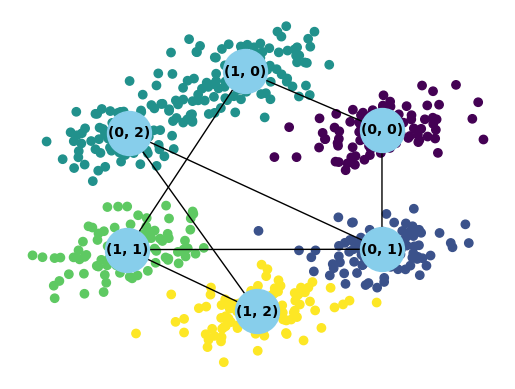

In [79]:
som_labels = koh.predict(hexagon[["x", "y"]].values)
plt.scatter(hexagon["x"], hexagon["y"], c=som_labels)
koh.plot_graph()

### Conclusion

The number of epochs does not affect the quality of clustering that much in this case, the scores are best around 25 epoch of training. It seems counterintuitive and conflict to the recommended number of epochs by Kohonen in the original [paper](https://sci2s.ugr.es/keel/pdf/algorithm/articulo/1990-Kohonen-PIEEE.pdf), as this value should be 500 times larger than the number of the network's units.



# Cube dataset

In [6]:
import networkx as nx

In [48]:
koh = KohonenNetwork(4, 2, vec_dim=3, neighboring_width=1)

In [49]:
koh.fit(cube[["x", "y", "z"]].values, 200, verbose = True, history = False)

Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29
Epoch 30
Epoch 31
Epoch 32
Epoch 33
Epoch 34
Epoch 35
Epoch 36
Epoch 37
Epoch 38
Epoch 39
Epoch 40
Epoch 41
Epoch 42
Epoch 43
Epoch 44
Epoch 45
Epoch 46
Epoch 47
Epoch 48
Epoch 49
Epoch 50
Epoch 51
Epoch 52
Epoch 53
Epoch 54
Epoch 55
Epoch 56
Epoch 57
Epoch 58
Epoch 59
Epoch 60
Epoch 61
Epoch 62
Epoch 63
Epoch 64
Epoch 65
Epoch 66
Epoch 67
Epoch 68
Epoch 69
Epoch 70
Epoch 71
Epoch 72
Epoch 73
Epoch 74
Epoch 75
Epoch 76
Epoch 77
Epoch 78
Epoch 79
Epoch 80
Epoch 81
Epoch 82
Epoch 83
Epoch 84
Epoch 85
Epoch 86
Epoch 87
Epoch 88
Epoch 89
Epoch 90
Epoch 91
Epoch 92
Epoch 93
Epoch 94
Epoch 95
Epoch 96
Epoch 97
Epoch 98
Epoch 99
Epoch 100
Epoch 101
Epoch 102
Epoch 103
Epoch 104
Epoch 105
Epoch 106
Epoch 107
Epoch 108
Epoch 109
Epoch 110


In [50]:
cube_labels = koh.predict(cube[["x", "y", "z"]].values, return_labels=True)
cube_labels

array([ 1,  1,  1, ..., 13, 13, 13])

Text(0.5, 0.92, 'Cube dataset with clusters')

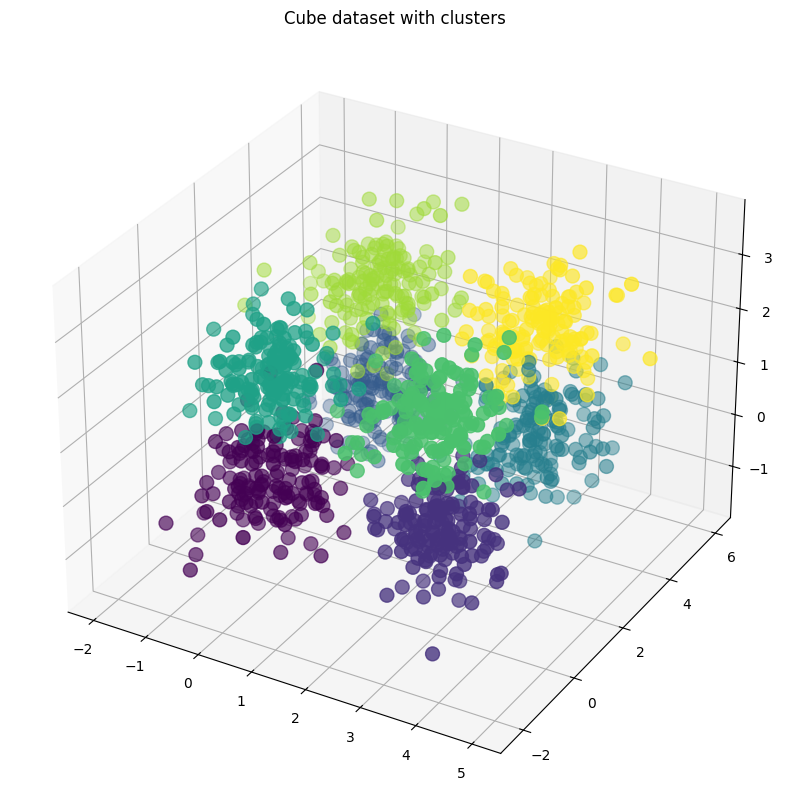

In [51]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(cube["x"], cube["y"], cube["z"],  s=100, c=cube["c"])
plt.title("Cube dataset with clusters")

Text(0.5, 0.92, 'Kohonen network clusters')

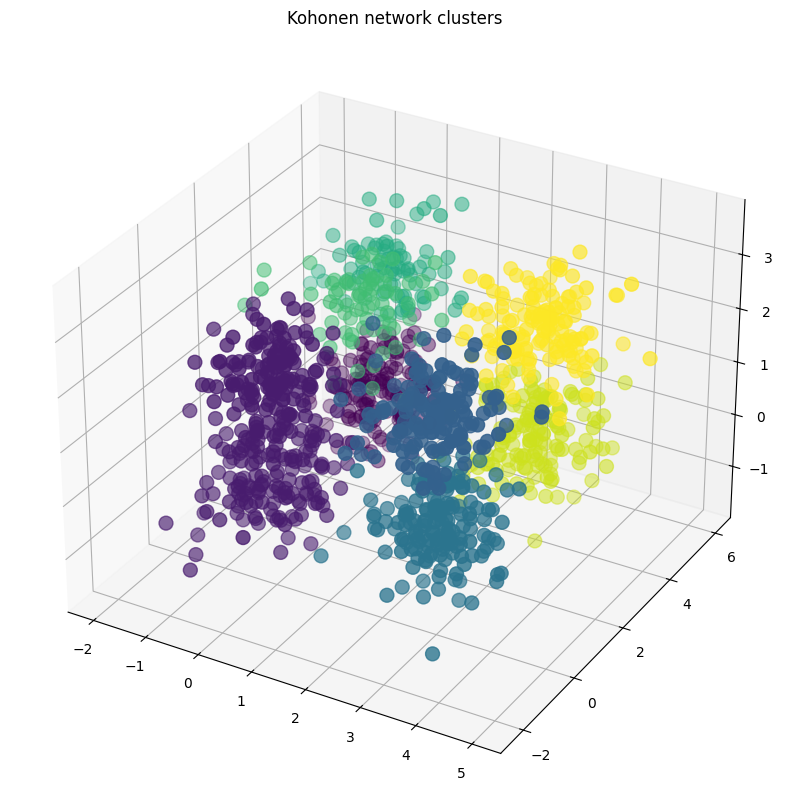

In [52]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(cube["x"], cube["y"], cube["z"],  s=100, c=cube_labels)
plt.title("Kohonen network clusters")

In [54]:
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, silhouette_score, davies_bouldin_score, calinski_harabasz_score

In [58]:
widths = np.linspace(0.1, 1, 10)
epochs = 50
num_trails = 10
scores = list(range(num_trails))
labels = cube["c"].values

for trail in range(num_trails):
    print(f"Trail {trail}")
    scores[trail] = {"homogeneity": [], "completeness": [], "v_measure": [], "silhouette": [], "davies_bouldin": [], "calinski_harabasz": []}
    for width in widths:
        koh = KohonenNetwork(4, 2, vec_dim=3, neighboring_width=width)    
        koh.fit(cube[["x", "y", "z"]].values, epochs)
        som_labels = koh.predict(cube[["x", "y", "z"]].values, return_labels=True)
        scores[trail]["homogeneity"].append(homogeneity_score(cube["c"].values, som_labels))
        scores[trail]["completeness"].append(completeness_score(cube["c"].values, som_labels))
        scores[trail]["v_measure"].append(v_measure_score(cube["c"].values, som_labels))

        scores[trail]["silhouette"].append(silhouette_score(cube[["x", "y", "z"]].values, som_labels))
        scores[trail]["davies_bouldin"].append(davies_bouldin_score(cube[["x", "y", "z"]].values, som_labels))
        scores[trail]["calinski_harabasz"].append(calinski_harabasz_score(cube[["x", "y", "z"]].values, som_labels))


Trail 0
Trail 1
Trail 2
Trail 3
Trail 4
Trail 5
Trail 6
Trail 7
Trail 8
Trail 9


In [59]:
import pickle
with open("scores_width_cube.pkl", "wb") as f:
    pickle.dump(scores, f)

In [60]:
mean_scores = {key: np.mean([scores[trail][key] for trail in range(num_trails)], axis=0) for key in scores[0].keys()}
std_scores = {key: np.std([scores[trail][key] for trail in range(num_trails)], axis=0) for key in scores[0].keys()}

Text(0.5, 0.98, 'Clustering scores vs neighboring width')

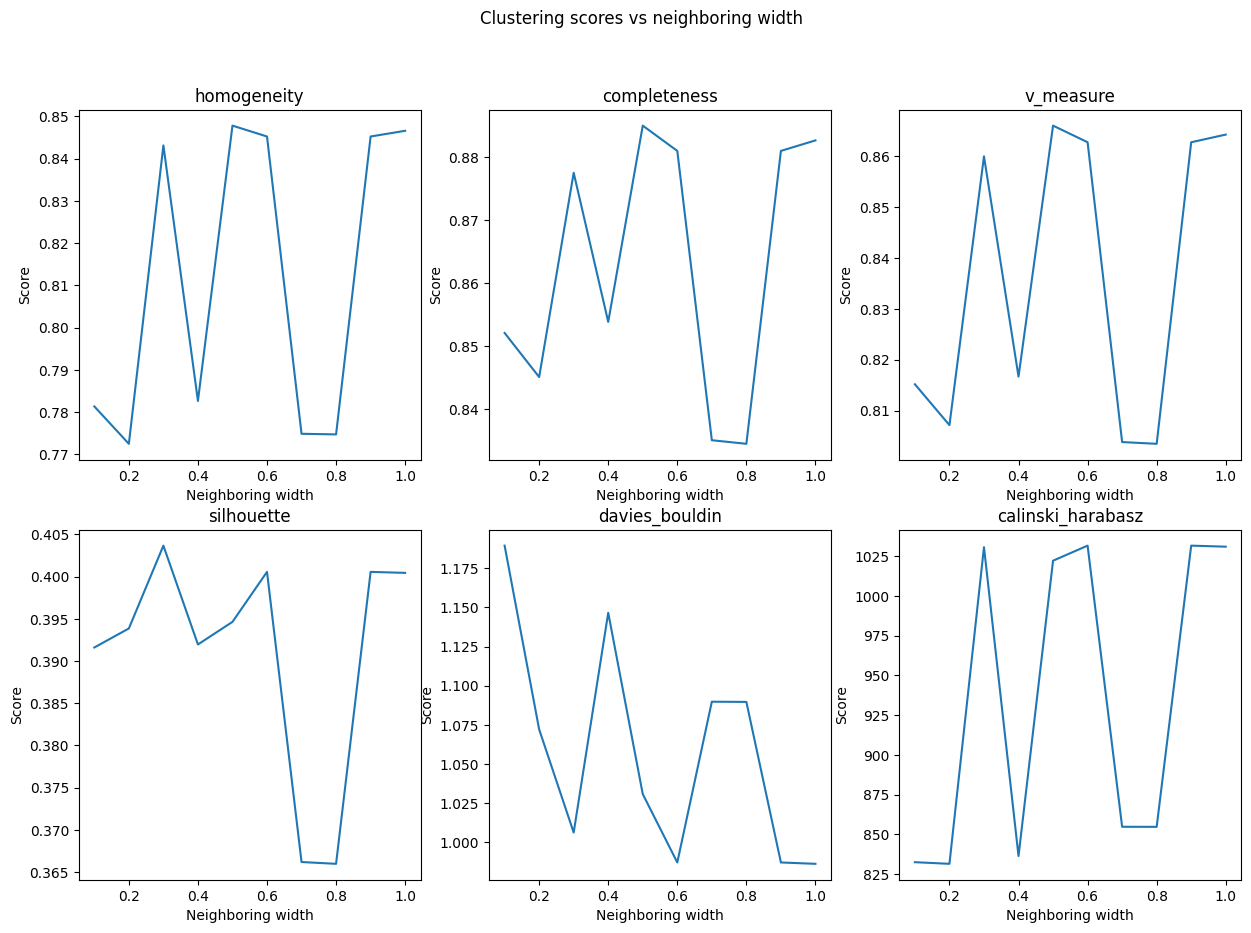

In [61]:
# subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs[0, 0].errorbar(widths, mean_scores["homogeneity"], yerr = std_scores["homogeneity"], label="Homogeneity")
axs[0, 1].errorbar(widths, mean_scores["completeness"], yerr = std_scores["completeness"], label="Completeness")
axs[0, 2].errorbar(widths, mean_scores["v_measure"], yerr = std_scores["v_measure"], label="V-measure")

axs[1, 0].errorbar(widths, mean_scores["silhouette"], yerr = std_scores["silhouette"], label="Silhouette")
axs[1, 1].errorbar(widths, mean_scores["davies_bouldin"], yerr = std_scores["davies_bouldin"], label="Davies-Bouldin")
axs[1, 2].errorbar(widths, mean_scores["calinski_harabasz"], yerr = std_scores["calinski_harabasz"], label="Calinski-Harabasz")

for i in range(2):
    for j in range(3):
        # set the title as label
        axs[i, j].set_title(list(mean_scores.keys())[i * 3 + j])
        axs[i, j].set_xlabel("Neighboring width")
        axs[i, j].set_ylabel("Score")


plt.suptitle("Clustering scores vs neighboring width")


### Conclusions

Interestingly there are correlation between the quality of clustering and the neighbouring witdth. As before in different trials the clustering results are the same


### Number of epochs

In [63]:
epochs = 200
width = 1
num_trails = 1
scores = list(range(num_trails))
labels = hexagon["c"].values

for trail in range(num_trails):
    scores[trail] = {"homogeneity": [], "completeness": [], "v_measure": [], "silhouette": [], "davies_bouldin": [], "calinski_harabasz": []}
    koh = KohonenNetwork(4, 2, vec_dim=3, neighboring_width=width)    
    print(f"Trail {trail}")
    old_labels = koh.fit(cube[["x", "y", "z"]].values, epochs, verbose = False, history=True)
    print("Finished training")
    for epoch in range(1, epochs):
        som_labels = old_labels[epoch]

        scores[trail]["homogeneity"].append(homogeneity_score(cube["c"].values, som_labels))
        scores[trail]["completeness"].append(completeness_score(cube["c"].values, som_labels))
        scores[trail]["v_measure"].append(v_measure_score(cube["c"].values, som_labels))

        scores[trail]["silhouette"].append(silhouette_score(cube[["x", "y", "z"]].values, som_labels))
        scores[trail]["davies_bouldin"].append(davies_bouldin_score(cube[["x", "y", "z"]].values, som_labels))
        scores[trail]["calinski_harabasz"].append(calinski_harabasz_score(cube[["x", "y", "z"]].values, som_labels))



Trail 0
Finished training


Text(0.5, 0.98, 'Clustering scores vs epochs')

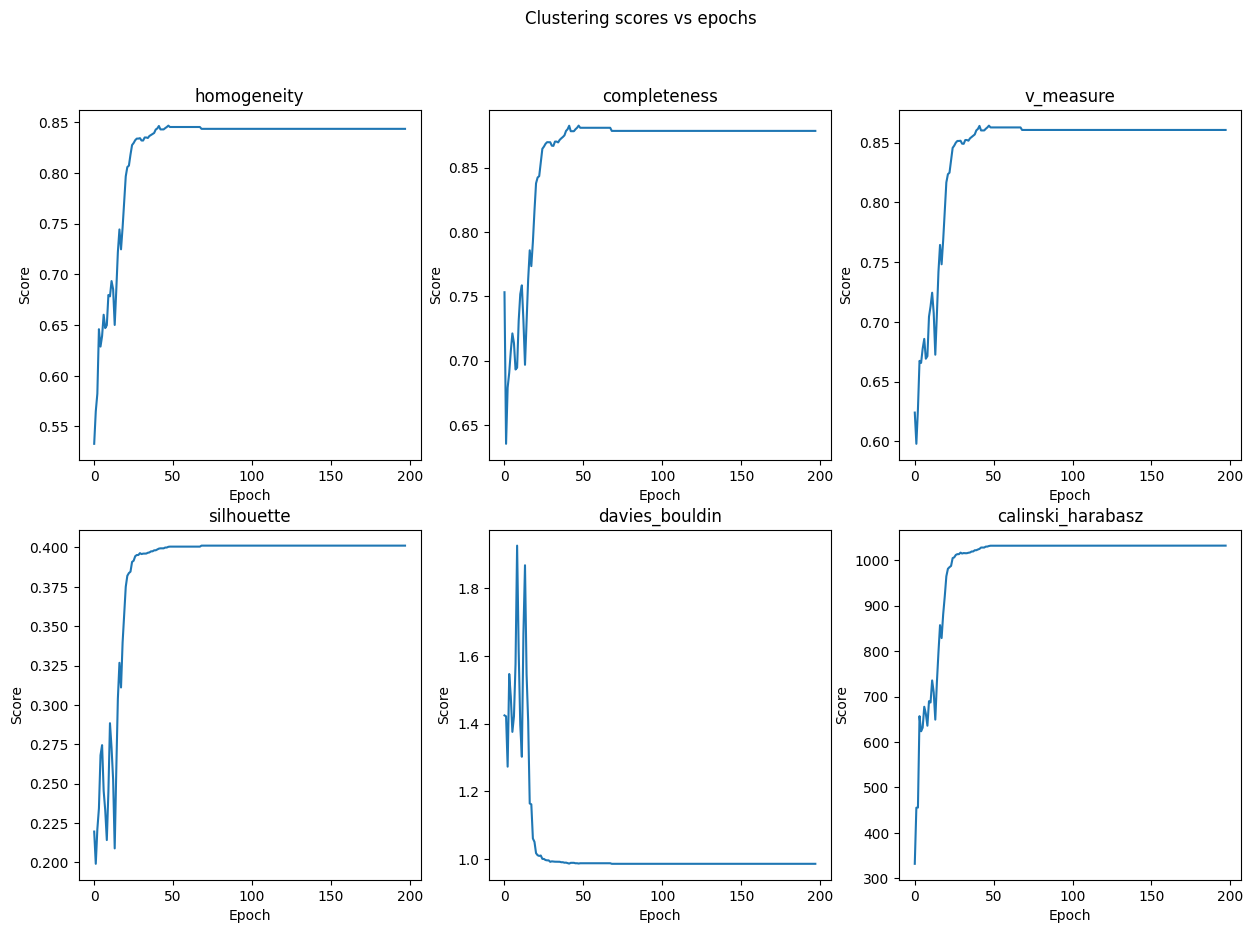

In [64]:
mean_scores = {key: np.mean([scores[trail][key] for trail in range(num_trails)], axis=0) for key in scores[0].keys()}
std_scores = {key: np.std([scores[trail][key] for trail in range(num_trails)], axis=0) for key in scores[0].keys()}

# subplots
starting_epoch = 1

fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs[0, 0].errorbar(list(range(epochs - starting_epoch - 1)), mean_scores["homogeneity"][starting_epoch:], yerr = std_scores["homogeneity"][starting_epoch:], label="Homogeneity")
axs[0, 1].errorbar(list(range(epochs - starting_epoch - 1)), mean_scores["completeness"][starting_epoch:], yerr = std_scores["completeness"][starting_epoch:], label="Completeness")
axs[0, 2].errorbar(list(range(epochs - starting_epoch - 1)), mean_scores["v_measure"][starting_epoch:], yerr = std_scores["v_measure"][starting_epoch:], label="V-measure")

axs[1, 0].errorbar(list(range(epochs - starting_epoch - 1)), mean_scores["silhouette"][starting_epoch:], yerr = std_scores["silhouette"][starting_epoch:], label="Silhouette")
axs[1, 1].errorbar(list(range(epochs - starting_epoch - 1)), mean_scores["davies_bouldin"][starting_epoch:], yerr = std_scores["davies_bouldin"][starting_epoch:], label="Davies-Bouldin")
axs[1, 2].errorbar(list(range(epochs - starting_epoch - 1)), mean_scores["calinski_harabasz"][starting_epoch:], yerr = std_scores["calinski_harabasz"][starting_epoch:], label="Calinski-Harabasz")

for i in range(2):
    for j in range(3):
        # set the title as label
        axs[i, j].set_title(list(mean_scores.keys())[i * 3 + j])
        axs[i, j].set_xlabel("Epoch")
        axs[i, j].set_ylabel("Score")


plt.suptitle("Clustering scores vs epochs")


### Conclusions

Here the results are much more intiuitive, the more training epochs, the better the clustrering

# Visual example

Here we are going to visualize the clustering on the 2D grid of points. Similar approach was done in the Kohonen paper.

Text(0.5, 1.0, 'Grid - the training data')

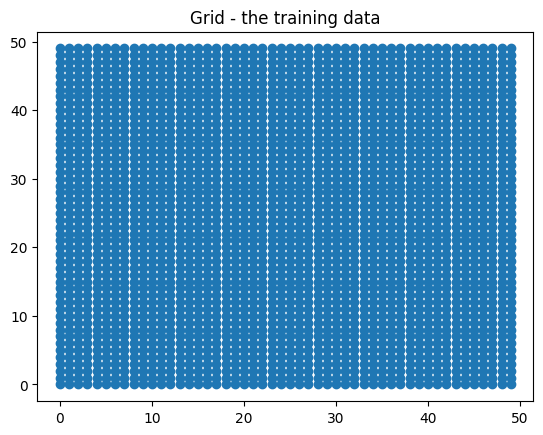

In [3]:
N = 50
M = 50

grid = np.array([[i, j] for i in range(N) for j in range(M)])
plt.scatter(grid[:, 0], grid[:, 1])
plt.title("Grid - the training data")

In [5]:
koh = KohonenNetwork(2, 3, vec_dim=2, grid="hexagonal")

In [6]:
koh.cells

array([[[0.47050869, 0.59937135],
        [0.84216742, 0.71554008],
        [0.48363981, 0.89570344]],

       [[0.73397076, 0.84502791],
        [0.74879135, 0.83483077],
        [0.95437883, 0.02328457]]])

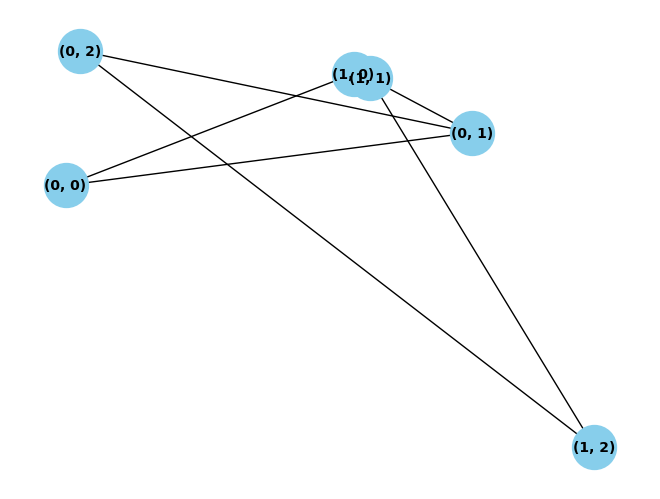

In [7]:
koh.plot_graph()

In [8]:
tuple(koh._initial_graph.nodes[(1,0)]["pos"])

(0.8660254037844386, 0.0)

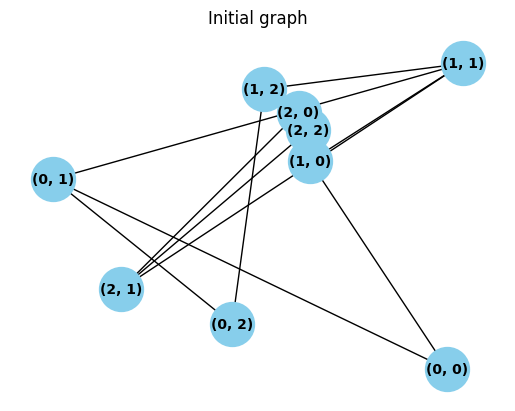

Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29
Epoch 30
Epoch 31
Epoch 32
Epoch 33
Epoch 34
Epoch 35
Epoch 36
Epoch 37
Epoch 38
Epoch 39
Epoch 40
Epoch 41
Epoch 42
Epoch 43
Epoch 44
Epoch 45
Epoch 46
Epoch 47
Epoch 48
Epoch 49
Epoch 50
Epoch 51
Epoch 52
Epoch 53
Epoch 54
Epoch 55
Epoch 56
Epoch 57
Epoch 58
Epoch 59
Epoch 60
Epoch 61
Epoch 62
Epoch 63
Epoch 64
Epoch 65
Epoch 66
Epoch 67
Epoch 68
Epoch 69
Epoch 70
Epoch 71
Epoch 72
Epoch 73
Epoch 74
Epoch 75
Epoch 76
Epoch 77
Epoch 78
Epoch 79
Epoch 80
Epoch 81
Epoch 82
Epoch 83
Epoch 84
Epoch 85
Epoch 86
Epoch 87
Epoch 88
Epoch 89
Epoch 90
Epoch 91
Epoch 92
Epoch 93
Epoch 94
Epoch 95
Epoch 96
Epoch 97
Epoch 98
Epoch 99


In [15]:
from som import GaussianNeighboringFunc
koh = KohonenNetwork(3, 3, vec_dim=2, neighboring_func=GaussianNeighboringFunc(initial_neighbouring_radius = 0.5))
plt.title("Initial graph")
koh.plot_graph()
koh.fit(grid, 100, verbose = True, history=False)

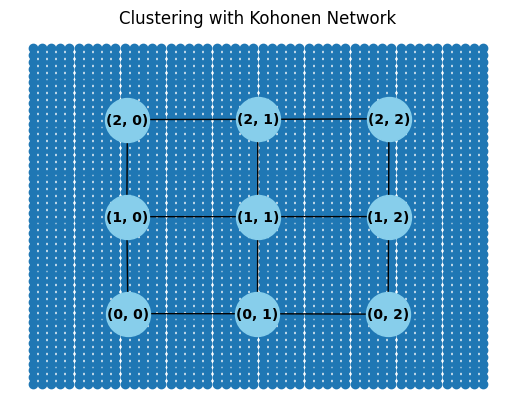

In [16]:
plt.title("Clustering with Kohonen Network")
plt.scatter(grid[:, 0], grid[:, 1])
koh.plot_graph()

In [ ]:
koh = KohonenNetwork(3, 3, vec_dim=2)
plt.title("Initial graph")
koh.plot_graph()
koh.fit(grid, 100, verbose = True, history=False)

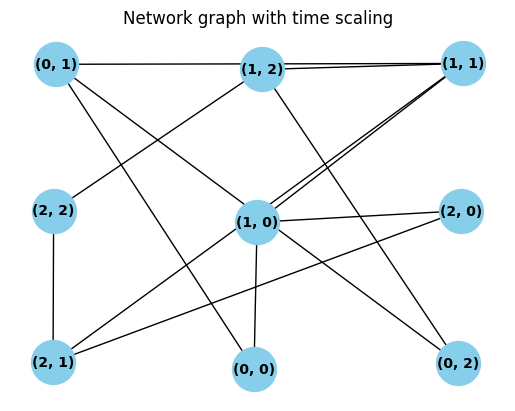

In [18]:
plt.title("Network graph with time scaling")
koh.plot_graph()

In [15]:
koh_without_time = KohonenNetwork(3, 3, vec_dim=2, time_scale=False)
koh_without_time.fit(grid, 100, verbose = True, history=False)

Epoch 0


Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29
Epoch 30
Epoch 31
Epoch 32
Epoch 33
Epoch 34
Epoch 35
Epoch 36
Epoch 37
Epoch 38
Epoch 39
Epoch 40
Epoch 41
Epoch 42
Epoch 43
Epoch 44
Epoch 45
Epoch 46
Epoch 47
Epoch 48
Epoch 49
Epoch 50
Epoch 51
Epoch 52
Epoch 53
Epoch 54
Epoch 55
Epoch 56
Epoch 57
Epoch 58
Epoch 59
Epoch 60
Epoch 61
Epoch 62
Epoch 63
Epoch 64
Epoch 65
Epoch 66
Epoch 67
Epoch 68
Epoch 69
Epoch 70
Epoch 71
Epoch 72
Epoch 73
Epoch 74
Epoch 75
Epoch 76
Epoch 77
Epoch 78
Epoch 79
Epoch 80
Epoch 81
Epoch 82
Epoch 83
Epoch 84
Epoch 85
Epoch 86
Epoch 87
Epoch 88
Epoch 89
Epoch 90
Epoch 91
Epoch 92
Epoch 93
Epoch 94
Epoch 95
Epoch 96
Epoch 97
Epoch 98
Epoch 99


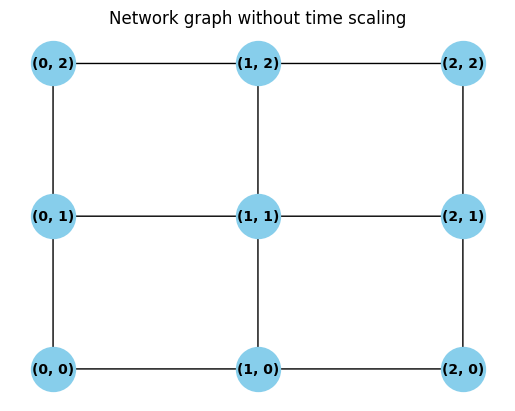

In [17]:
plt.title("Network graph without time scaling")
koh_without_time.plot_graph()

# Time in the neighbouring function

I noticed, that the Kohonen Network  works better when it comes to clustering when I use time (current epoch) as a scalar of distance in the neighbouring function. Howeever, in that case the relationships between each cells were neglected - there were no grid of the network used. 

The reason for that behaviour is very simple. When using the time as scalar, in the later epochs only the best node is updated - the scaled distance becomes too big and are considered as non-relevant by the scalar function.

